In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

To learn about KMeans and DBScan

Clustering is a way to join the elements in the group closer and the distances between the groups bigger. 
Since it is an unsupervised learning. 

Non-Hierarchical Clustering includes:
- K-means
- DBSCAN 

Hierarchical Clustering 
- ... 

# This post is about Non-Hierarchical Clustering 

K-Means is Center-based Clustering and its separate using different centroids. 

1. Initially, random points are generated within the data. 
2. K Clusters are created by associated every observation with the nearest mean. 
3. Centroid of each k clusters become new mean 
4. Step 2 and 3 are repeated until convergence has been reached. 

This can be performed using KMeans function easily with Scikit learn library

KMeans(n_clusters=, init=, random_state=)

Adaptive Boosting 

1. Use the first classifier to train in the dataset and create a predictive value 
2. Increase the weight of the training sample that is falsely classified 
3. Using the update weights to train the second classifier and then train again to make the wegihts 
4. Repeat the second and third step again 


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [8]:
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap 
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    # np.linspace() function creates an array of evenly spaced values over a specified interval. 
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    # meshgrid create a rectangular grid out of an array of x values and an array of y values. 
    x1, x2 = np.meshgrid(x1s, x2s)
    # ravel function 
    # makes for example 
    # [1, 2, 3]
    # [4, 5, 6]
    # into 
    # [1, 2, 3, 4, 5, 6]
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour: 
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 2. 1. 1. 2.]
[1. 1. 1. 1. 1. 1. 4. 1. 1. 2.]
[1. 2. 1. 1. 1. 1. 4. 1. 1. 2.]
[2. 4. 1. 1. 1. 1. 4. 1. 1. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.  1.  1.  1.  1.  1.  1.5 1.  1.  1.5]
[1.   1.   1.   1.   1.   1.   2.25 1.   1.   1.5 ]
[1.    1.    1.    1.    1.    1.    3.375 1.    1.    1.5  ]
[1.     1.5    1.     1.     1.     1.     5.0625 1.     1.     1.5   ]


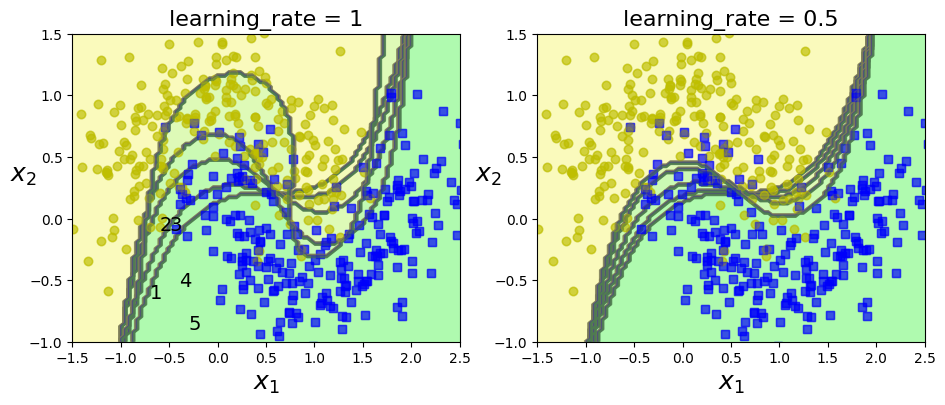

In [9]:
from sklearn.svm import SVC

m = len(X_train)

plt.figure(figsize=(11,4))
for subplot, learning_rate in ((121, 1), (122, 0.5)): 
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        print(sample_weights[:10])
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121: 
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5, -0.10, "3", fontsize=14)
        plt.text(-0.4, -0.55, "4", fontsize=14)
        plt.text(-0.3, -0.90, "5", fontsize=14)

plt.show()